In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import math

In [62]:
plt.rcParams.update({'font.size': 22})
name = "PQ"

In [63]:
data = pd.read_csv(name + ".csv", names=["V", "N", "l", "t1", "t2", "t3", "t4"])

In [85]:
K = 0.2
sigma_t = 0.5
sigma_V = 0
sigma_l = 0
data["Q"] = data["V"] / ((data["t1"] + data["t2"] + data["t3"] + data["t4"]) / 4) * (10 ** 3)
sigma_Q = 0.5
data["P"] = 9.80665 * K * data["l"]
sigma_P = 1.5
X = data["Q"].values
sigma_X = sigma_Q
Y = data["P"].values
sigma_Y = sigma_P

In [86]:
A = np.vstack([X[:-4], np.ones(len(X[:-4]))]).T
k, b = np.linalg.lstsq(A, Y[:-4], rcond=None)[0]
#sigma_k = math.sqrt((Y.std() - Y.mean()**2 ) / (X.std() - X.mean()**2 ) - b**2 ) / math.sqrt(len(X))
#eps_k = sigma_k / k
#sigma_b = sigma_k * math.sqrt(X.std() / X.mean() - X.mean()**2 )

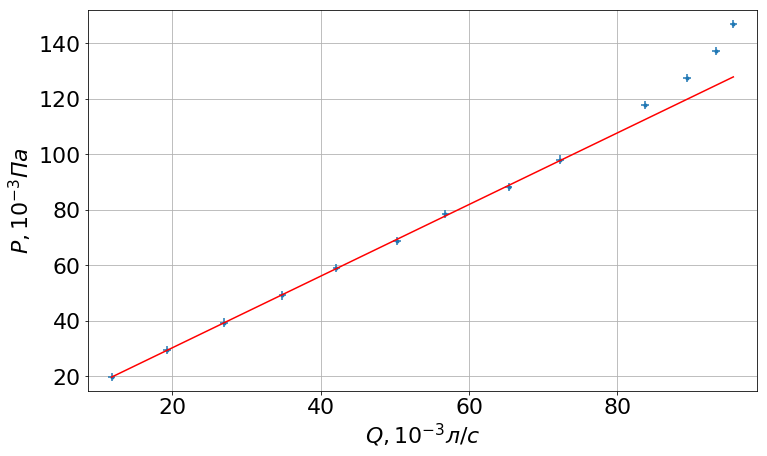

In [87]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca()
plt.scatter(X, Y, marker=".")
plt.errorbar(X, Y, xerr=sigma_X, yerr=sigma_Y, linestyle="None")
delta_x = (X.max() - X.min()) / len(X)
delta_y = (Y.max() - Y.min()) / len(Y)
ax.set_xlim(X.min() - delta_x/2, X.max() + delta_x/2)
ax.set_ylim((Y.min() - delta_y/2), Y.max() + delta_y/2)
plt.xlabel("$Q, 10^{-3} л/с$")
plt.ylabel("$P, 10^{-3} Па$")
plt.plot(X, (k*X + b), 'r', label='Fitted line')
plt.grid(True)
plt.savefig("../" + name + ".png")

In [88]:
k

1.2927593316214034

In [68]:
b

4.283877346825285

In [69]:
data = np.around(data, decimals = 2)

In [70]:
data

,V,N,l,t1,t2,t3,t4,Q,P
0,0.5,1,10,42.85,42.12,42.19,41.92,11.83,19.61
1,0.5,2,15,26.12,25.80,26.03,25.79,19.28,29.42
2,1.0,3,20,37.69,36.44,37.78,36.25,27.00,39.23
3,1.0,4,25,29.12,28.32,28.25,29.07,34.86,49.03
4,1.5,5,30,35.69,35.29,35.81,35.63,42.13,58.84
5,1.5,6,35,30.28,29.62,29.41,29.96,50.31,68.65
6,2.0,7,40,35.09,35.25,35.22,35.28,56.80,78.45
7,2.0,8,45,30.59,30.75,30.71,30.41,65.33,88.26
8,2.5,9,50,34.78,34.55,34.52,34.49,72.29,98.07
9,2.5,10,60,30.02,30.08,29.45,29.92,83.70,117.68


In [72]:
print(data.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &    V &   N &   l &     t1 &     t2 &     t3 &     t4 &      Q &       P \\
\midrule
0  &  0.5 &   1 &  10 &  42.85 &  42.12 &  42.19 &  41.92 &  11.83 &   19.61 \\
1  &  0.5 &   2 &  15 &  26.12 &  25.80 &  26.03 &  25.79 &  19.28 &   29.42 \\
2  &  1.0 &   3 &  20 &  37.69 &  36.44 &  37.78 &  36.25 &  27.00 &   39.23 \\
3  &  1.0 &   4 &  25 &  29.12 &  28.32 &  28.25 &  29.07 &  34.86 &   49.03 \\
4  &  1.5 &   5 &  30 &  35.69 &  35.29 &  35.81 &  35.63 &  42.13 &   58.84 \\
5  &  1.5 &   6 &  35 &  30.28 &  29.62 &  29.41 &  29.96 &  50.31 &   68.65 \\
6  &  2.0 &   7 &  40 &  35.09 &  35.25 &  35.22 &  35.28 &  56.80 &   78.45 \\
7  &  2.0 &   8 &  45 &  30.59 &  30.75 &  30.71 &  30.41 &  65.33 &   88.26 \\
8  &  2.5 &   9 &  50 &  34.78 &  34.55 &  34.52 &  34.49 &  72.29 &   98.07 \\
9  &  2.5 &  10 &  60 &  30.02 &  30.08 &  29.45 &  29.92 &  83.70 &  117.68 \\
10 &  3.0 &  11 &  65 &  33.56 &  33.72 &  33.49 &  33.49 &  89.38 &  127.